# <center><font color=navy>Data Science for Quantitative Finance</font></center>
## <center><font color=navy> Key Variables in Finance</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

***

>Here are some articles that survey stylized facts of asset return (daily & univariate). 
>- [Cont, Rama (2001) "Empirical properties of asset returns: stylized facts and statistical issues," Qunatitative Finance, 1, 223-236.](http://rama.cont.perso.math.cnrs.fr/pdf/empirical.pdf)
>- [Rydberg, T. (2005) "Realistic Statistical Modeling of Financial Data," Technical Report, Nuffield College, Oxford, UK.](http://www-stat.wharton.upenn.edu/~steele/Resources/FTSResources/StylizedFacts/Rydberg.pdf)
>- [Malmsten, H., & Teräsvirta, T. (2010). Stylized facts of financial time series and three popular models of volatility. European Journal of pure and applied mathematics, 3(3), 443-477.](http://www-stat.wharton.upenn.edu/~steele/Resources/FTSResources/StylizedFacts/MalmstenTerasvirta04.pdf)

***

### 1. **Price**  
Price is the most fundamental variable in finance, referring to the amount at which a security (such as stocks, bonds, or commodities) is traded between buyers and sellers. Price is primarily determined by the forces of demand and supply: when demand for an asset exceeds supply, prices rise, and when supply exceeds demand, prices fall. Price is publicly available data on most trading platforms and forms the basis of technical analysis and predictive models. Traders use price data to analyze historical trends and forecast future movements. This can be done through technical analysis (chart patterns) or machine learning models that predict future prices based on historical patterns and other factors.

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Fetch Historical Price Data
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2023-01-01"

# Fetch data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataset
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.076584,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,176.803848,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.100861,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.227921,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.395187,86709100


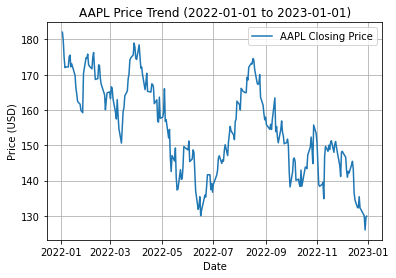

In [4]:
# Visualize the Price Trend
plt.plot(data['Close'], label=f"{ticker} Closing Price")
plt.title(f"{ticker} Price Trend ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

### Summary of Options and Variables in `yf.download`

The `yf.download` function from the `yfinance` library allows users to fetch a wide range of financial data for analysis. Below is a summary of the key variables and customization options available.

---

#### **Default Variables Retrieved**
When fetching data, the following columns are included by default:

| **Variable**    | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| `Open`          | The price of the asset at the start of the trading session.                     |
| `High`          | The highest price of the asset during the trading session.                     |
| `Low`           | The lowest price of the asset during the trading session.                      |
| `Close`         | The price of the asset at the end of the trading session.                      |
| `Adj Close`     | The adjusted closing price, accounting for corporate actions like splits and dividends. |
| `Volume`        | The total number of shares or contracts traded during the session.             |

---


>- **Regular Trading Hours**
        9:30 AM to 4:00 PM Eastern Time (ET)
>- **Extended Trading Hours**
    >- Pre-Market Trading:
        4:00 AM to 9:30 AM ET
        Limited trading activity; liquidity may be lower, and spreads wider.
    >- After-Hours Trading:
        4:00 PM to 8:00 PM ET
        Allows traders to react to after-market earnings reports and other news.


#### **Customization Options**

| **Parameter**        | **Description**                                                                                  | **Examples**                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| `interval`           | Defines the data frequency. Options include `"1d"`, `"1wk"`, `"1mo"`, `"1h"`, `"5m"`, etc.      | `interval="1h"` fetches hourly data.                                                            |
| `start` and `end`    | Specify the start and end dates for fetching data.                                               | `start="2022-01-01", end="2023-01-01"`.                                                         |
| `period`             | Fetches data for a specific period instead of using `start` and `end`.                          | `"1mo"`, `"1y"`, `"5y"`, `"max"`.                                                               |
| `prepost`            | Includes pre-market and after-hours trading data if set to `True`.                              | `prepost=True` includes extended hours trading data.                                            |
| `group_by`           | Customizes the output format (default is `"ticker"`).                                            | Generally left as default.                                                                      |
| `auto_adjust`        | Adjusts prices for stock splits and dividends if `True`.                                         | `auto_adjust=True` simplifies the dataset by excluding `Adj Close`.                             |
| `progress`           | Disables the progress bar during data download if set to `False`.                                | `progress=False` speeds up scripts by hiding progress.                                          |

---

#### **Additional Features with `yfinance`**

1. **Dividends and Splits**:
   - Retrieve dividend and stock split data using:
     ```python
     data = yf.Ticker("AAPL")
     print(data.dividends)  # Dividends
     print(data.splits)     # Splits
     ```

2. **Options Data**:
   - Fetch available option expiration dates:
     ```python
     options = data.options
     print(options)
     ```

3. **Financial Statements**:
   - Retrieve detailed financial reports:
     ```python
     print(data.financials)      # Income statement
     print(data.balance_sheet)   # Balance sheet
     print(data.cashflow)        # Cash flow statement
     ```

### 2. **Volume**  
Volume represents the total number of shares or contracts traded for a security within a specific time frame. Like price, volume is also publicly available trading data. Volume provides insights into market activity and is commonly used to confirm trends or signals in price movements. High volume during a price increase may indicate a strong upward trend, while low volume can signal a weak trend or potential reversal.

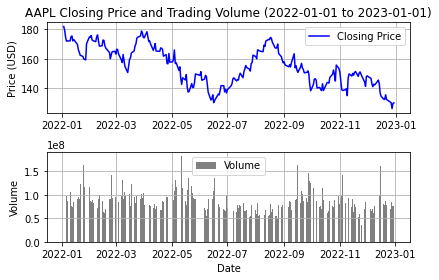

In [5]:
# Visualize Volume and Price Together

# Plot Closing Price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label="Closing Price", color="blue")
plt.title(f"{ticker} Closing Price and Trading Volume ({start_date} to {end_date})")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()

# Plot Volume
plt.subplot(2, 1, 2)
plt.bar(data.index, data['Volume'], color="gray", label="Volume")
plt.ylabel("Volume")
plt.xlabel("Date")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### 3. **Returns**

Returns represent the percentage change in the price of an asset over time. In finance, returns are often preferred over absolute prices in modeling because returns normalize price movements, making them easier to compare across assets or time periods. Price data is typically non-stationary, meaning its statistical properties like mean and variance change over time. To address this issue, financial models often use returns, which tend to be more stationary and exhibit more stable statistical properties. Modeling returns also makes it easier to capture key aspects of asset performance, such as risk and expected reward, in a more robust manner.

---

#### **Arithmetic Returns**

Let $P_t$ be the price of an asset at time $t$. Assuming no dividends, the net return over the holding period from time $t-1$ to time $t$ is:

$$
R_t = \frac{P_t}{P_{t-1}} - 1 = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

The numerator $P_t - P_{t-1}$ is the revenue or profit during the holding period, with a negative profit meaning a loss. The denominator, $P_{t-1}$, was the initial investment at the start of the holding period. Therefore, the net return can be viewed as the relative revenue or profit rate.

The revenue from holding an asset is:

**revenue = initial investment × net return**

- Returns are scale-free, meaning that they do not depend on units (e.g., dollars, cents, etc.).
- Returns are not unitless. Their unit is time; they depend on the units of $t$ (hour, day, etc.).

---

#### **Log Returns**

Log returns, also called continuously compounded returns, are denoted by $r_t$ and defined as:

$$
r_t = \log(1 + R_t) = \log\left(\frac{P_t}{P_{t-1}}\right) = \log(P_t) - \log(P_{t-1})
$$

> **Example**: Assume $P_{t=0} = 10$, $P_{t=1} = 20$, $P_{t=2} = 10$. What’s the total return at time 2?

For details, see: [Calculating and Comparing Security Returns is Harder than you Think: A Comparison between Logarithmic and Simple Returns](https://www.sciencedirect.com/science/article/abs/pii/S1057521914001380)

---

#### **Adjustment for Dividends**

Many stocks, especially those of mature companies, pay dividends that must be accounted for when computing returns. Similarly, bonds pay interest. If a dividend (or interest) $D_t$ is paid prior to time $t$, then the gross return at time $t$ is defined as:

$$
R_t = \frac{P_t + D_t}{P_{t-1}} - 1
$$

and the log return is:

$$
r_t = \log(1 + R_t) = \log(P_t + D_t) - \log(P_{t-1})
$$

[*********************100%%**********************]  1 of 1 completed


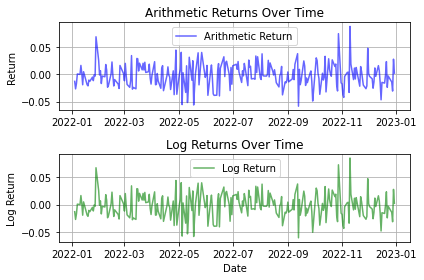

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Fetch Historical Price Data
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download price data
data = yf.download(ticker, start=start_date, end=end_date)

# Compute Arithmetic Returns
data['Arithmetic Return'] = data['Close'].pct_change()

# Compute Log Returns
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Visualize Returns

# Plot Arithmetic Returns
plt.subplot(2, 1, 1)
plt.plot(data['Arithmetic Return'], label="Arithmetic Return", color="blue", alpha=0.6)
plt.title("Arithmetic Returns Over Time")
plt.ylabel("Return")
plt.grid()
plt.legend()

# Plot Log Returns
plt.subplot(2, 1, 2)
plt.plot(data['Log Return'], label="Log Return", color="green", alpha=0.6)
plt.title("Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### Stylized facts for daily asset returns: Taxonomy

Link to the notebook demonstrating the stylized fact of asset returns:  
[Stylized Facts of Asset Returns Notebook](https://github.com/AliHabibnia/CMDA_4984_Data_Science_for_Quantitative_Finance/blob/main/Lecture%2002_Stylized%20Facts%20of%20Asset%20Returns.ipynb)


For daily data we observe the following stylized facts:

* Andreou, Pittis and Spanos (2001)
    - distribution
    - dependence
    - heterogeneity
    
* Challet, Marsili and Zhang (2001)
    - volatility and volume clustering
    - return and volume histograms
    
* Cont (2001)
    
    - absence of autocorrelations
    
    -heavy tails
    
    -gain/loss asymmetry
    
    -aggregational Gaussianity
    
    -intermittency
    
    -volatility clustering
    
    -conditional heavy tails
    
    -slow decay of autocorrelation in absolute returns
    
    -leverage effect
    
    -volume/volatility correlation
    
    -asymmetry in time scales

* Johnson, Jefferies and Hui (2003)
    - fat-tailed PDF of price-changes, with non-trivial scaling properties
    - slow decay of the autocorrelation of absolute value of price-changes
    - volatility clustering
    - fast decay of the autocorrelation of price-changes
    
* Taylor (2005)

    - the distribution of returns is not normal
    - there is almost no correlation between returns for different days
    - the correlations between the magnitudes of returns on nearby days are positive and statistically significant
    
* Zivot (2016)

    - Prices appear to be random walk non-stationary and returns appear to be mostly covariance stationary. There is evidence that return volatility changes over time.
    - Returns are not normally distributed. Empirical distributions have much fatter tails than the normal distribution (excess kurtosis).
    - Assets that have high average returns tend to have high standard deviations (volatilities) and vice-versa. This is the no free lunch principle.
    - Returns on individual assets (stocks) have higher standard deviations than returns on diversified portfolios of assets (stocks).
    - Returns are approximately uncorrelated over time. That is, there is little evidence of linear time dependence in asset returns. 
    - Returns are not independent over time. Absolute and squared returns are positively auto correlated and the correlation dies out very slowly. Volatility appears to be auto correlated and, hence, predictable.

<blockquote style="background-color:#e6f7ff; padding: 15px; border-left: 5px solid #1e90ff;">
Machine learning is particularly well-suited for modeling financial data due to the ability to handle complex patterns and capture the stylized facts observed in daily asset returns. Additionally, in cases where there are many predictors or when we consider the comovement between asset returns, machine learning models are effective at handling high dimensionality.
</blockquote>

### 4. **Volatility**  
Volatility measures the degree of price variation over time. High volatility indicates large swings in price, while low volatility suggests more stability. Volatility is crucial for assessing risk and pricing derivatives like options and futures. Traders use volatility to evaluate the uncertainty in price movements and to set up strategies like volatility arbitrage, which profits from differences between implied and realized volatility. Volatility can also vary over time, leading to the use of models (such as GARCH) to capture these dynamic changes.

[*********************100%%**********************]  1 of 1 completed


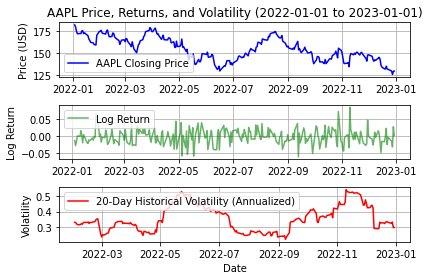


Key Volatility Statistics:
Mean Historical Volatility: 35.37%
Max Historical Volatility: 54.31%
Min Historical Volatility: 22.00%


In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch Historical Price Data
ticker = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Compute Log Returns
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Calculate Historical Volatility
# Historical volatility as the standard deviation of log returns
data['Volatility'] = data['Log Return'].rolling(window=20).std() * np.sqrt(252)

# Plot Price, Returns, and Volatility

# Subplot 1: Price
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=f"{ticker} Closing Price", color="blue")
plt.title(f"{ticker} Price, Returns, and Volatility ({start_date} to {end_date})")
plt.ylabel("Price (USD)")
plt.grid()
plt.legend()

# Subplot 2: Log Returns
plt.subplot(3, 1, 2)
plt.plot(data['Log Return'], label="Log Return", color="green", alpha=0.6)
plt.ylabel("Log Return")
plt.grid()
plt.legend()

# Subplot 3: Historical Volatility
plt.subplot(3, 1, 3)
plt.plot(data['Volatility'], label="20-Day Historical Volatility (Annualized)", color="red")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# 4. Key Volatility Statistics
print("\nKey Volatility Statistics:")
print(f"Mean Historical Volatility: {data['Volatility'].mean():.2%}")
print(f"Max Historical Volatility: {data['Volatility'].max():.2%}")
print(f"Min Historical Volatility: {data['Volatility'].min():.2%}")


---

## Volatility and Its Calculation Methods

Broadly, volatility estimation methods may be split into **Model-Free** and **Model-Based** approaches.

---


### **1. Model-Free Methods**

Model-free approaches rely on directly observed market data and impose minimal assumptions about the underlying price-generation process. These methods are generally straightforward and widely used for descriptive or exploratory purposes.

##### **Common Model-Free Methods**

1. **Historical Volatility**  
   - Defined as the standard deviation of historical returns over a chosen sample period.  
   - Typically annualized using:  
     $$
     \sigma_{\text{annualized}} = \sigma_{\text{daily}} \times \sqrt{252},
     $$  
     where 252 is the approximate number of trading days in a year.

2. **Parkinson Volatility**  
   - Relies on the observed intraday range (high and low prices) to estimate volatility:  
     $$
     \sigma = \sqrt{\frac{1}{4n \ln(2)} \sum_{i=1}^n \left(\ln\frac{H_i}{L_i}\right)^2},
     $$  
     where $H_i$ and $L_i$ are the daily high and low prices, respectively.

3. **Realized Volatility**  
   - Uses intraday (high-frequency) returns to capture finer price movements:  
     $$
     \sigma_{\text{realized}}^2 = \sum_{t=1}^n r_t^2,
     $$  
     where $r_t$ denotes intraday returns at time $t$.

4. **Volatility Index (VIX)**  
   - Constructed from the implied volatilities of a broad set of S&P 500 index options.  
   - Widely viewed as a model-free measure of the market’s expectation of 30-day forward-looking volatility, though it is derived through specific option pricing formulas.

5. **Exponential Weighted Moving Average (EWMA)**  
   - Assigns greater weight to recent returns and less to older observations:  
     $$
     \sigma_t^2 = \lambda \sigma_{t-1}^2 + (1 - \lambda) r_t^2,
     $$  
     where $r_t$ is the return on day $t$ and $\lambda$ is the decay factor (commonly 0.94).

---

### **2. Model-Based Methods**

Model-based methods employ statistical or econometric models to estimate or predict volatility. These approaches are more complex and often allow for deeper insights into volatility’s temporal structure and potential nonlinearities.

##### **Common Model-Based Methods**

1. **GARCH Models**  
   - Generalized Autoregressive Conditional Heteroskedasticity (GARCH) models incorporate time-varying conditional volatility:  
     $$
     \sigma_t^2 = \alpha_0 + \sum_{i=1}^q \alpha_i r_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2.
     $$

2. **Stochastic Volatility Models**  
   - Assume that volatility itself follows a stochastic process. A common specification is:  
     $$
     \sigma_t = \exp(h_t), 
     \quad h_t = \mu + \phi h_{t-1} + \epsilon_t,
     $$  
     where $h_t$ is the (latent) log-volatility.

3. **Implied Volatility Models**  
   - Volatility is inferred from option prices using models such as Black–Scholes (or its extensions).  
   - Implied volatility is then the volatility parameter that equates the model-based option price with the observed market price.

4. **Kalman Filter**  
   - A state-space method that estimates an unobservable variable—here, volatility—based on observed returns or prices:  
     $$
     x_t = F x_{t-1} + w_t, 
     \quad 
     y_t = H x_t + v_t,
     $$  
     where $x_t$ is the latent state (e.g., volatility), $y_t$ is the observed return, and $w_t, v_t$ capture process and measurement errors, respectively.

5. **Jump Diffusion Models**  
   - Extend stochastic volatility frameworks by allowing discrete jumps in price processes:  
     $$
     dS_t = \mu S_t dt + \sigma S_t dW_t + J dN_t,
     $$  
     where $J$ is the jump size and $dN_t$ is an increment of a Poisson process.

6. **HAR Models (Heterogeneous Autoregressive Models)**  
   - Decompose volatility into short-, medium-, and long-horizon components, typically daily, weekly, and monthly:  
     $$
     \sigma_t = \beta_0 + \beta_1 \sigma_{t-1} + \beta_2 \sigma_{t-5} + \beta_3 \sigma_{t-22} + \epsilon_t.
     $$  
     This design allows richer dynamics by capturing multiple volatility horizons simultaneously.

---

Each approach has its own advantages and is chosen based on the scope of analysis, data granularity, and any assumptions (or lack thereof) regarding the price-generation process.




### 5. **Bid-Ask Spread**  
The bid-ask spread is the difference between the highest price a buyer is willing to pay and the lowest price a seller is willing to accept for an asset. Traders, especially market makers and high-frequency traders, focus on narrowing the spread to capture price inefficiencies. A larger spread may indicate less liquidity or higher risk in the market.

### 6. **Limit Order Book (LOB) Data**  
LOB data provides a detailed view of the market by showing all outstanding limit orders, both bids and asks, at different price levels. Unlike the bid-ask spread, which reflects only the best available prices, LOB data reveals the depth of the market, displaying the number of shares or contracts available at various price points. Traders use LOB data to understand the full supply and demand dynamics in the market and to anticipate potential price movements based on the order flow.

### 7. **Macroeconomic Leading Indicators**  
Macroeconomic leading indicators are economic data points that help predict future economic performance. These indicators are critical for traders who anticipate the effects of economic shifts on financial markets. Examples include **interest rates**, which influence borrowing costs and economic growth, and **inflation rates**, which reflect the cost of goods and services over time. Other examples include **unemployment claims**, which indicate labor market strength, and **consumer confidence indexes**, which gauge the optimism of consumers regarding economic conditions. Traders use these indicators to forecast market trends and adjust their strategies accordingly.

### 8. **Financial Indicators**  
Financial indicators are metrics used to assess the financial health of a company or the overall market. These indicators are commonly used by traders to evaluate company performance or assess market risk. **Liquidity ratios**, such as the current ratio or quick ratio, measure a company's ability to meet its short-term obligations. **Leverage ratios**, such as the debt-to-equity ratio, assess a company's financial structure and risk level. **Profitability ratios**, such as return on assets (ROA) or return on equity (ROE), measure how efficiently a company generates profits relative to its assets or shareholders' equity. Traders use these financial indicators to make informed decisions on investments and assess market conditions.


### 9. **Alternative Data**

In addition to traditional data such as price, volume, and LOB, algorithmic traders increasingly use **alternative data** to enhance predictive models and gain an edge in the markets. Alternative data sources are often non-traditional and come from various unique datasets. Some examples include:

- **Textual Data**: Collected from news articles, social media posts, and earnings reports. This data is analyzed using natural language processing (NLP) techniques to gauge market sentiment or predict potential market-moving events.
  
- **Satellite Imagery**: Used to monitor industrial activity, track traffic to retail locations, or estimate agricultural yields. For example, traders might use satellite data to predict supply chain disruptions.

- **Web Scraping**: Involves collecting data from websites, such as product prices, reviews, or job postings. This data can be used to assess business activity or competitive positioning in an industry.

- **Google Trends**: Reflects global search behavior, providing insight into consumer interest or demand for certain products or services. Traders use this data to anticipate changes in market trends.

- **Sensor Data**: Data from IoT (Internet of Things) devices, such as environmental sensors or vehicle tracking systems, to assess real-time economic activity or supply chain efficiency.

- **Credit Card and Transaction Data**: Provides insights into consumer spending behavior. Traders use this data to gauge economic conditions and predict revenue performance for retail companies.

Incorporating alternative data into algorithmic trading strategies allows traders to capture unique market insights that are not available from traditional financial datasets, enabling more informed and innovative decision-making.

---